In [9]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
from sklearn.decomposition import NMF
plt.rcParams['figure.figsize'] = (14, 5)

In [10]:
x, sr = librosa.load('media/mixture.wav')
print(sr)

22050


In [11]:
ipd.Audio(x, rate=sr)

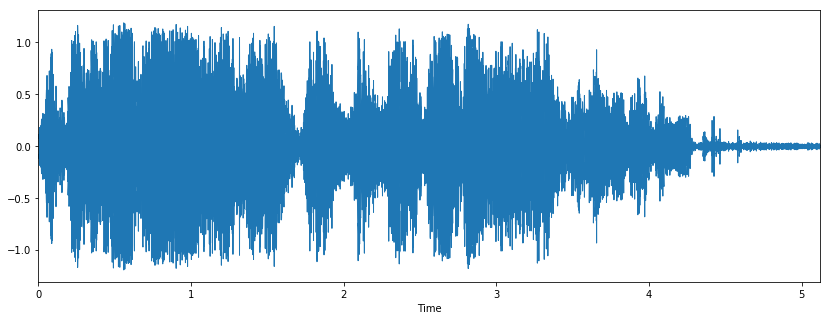

In [12]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [13]:
S = librosa.stft(x)
print(S.shape)

(1025, 221)


C:\Users\florent\Anaconda3\lib\site-packages\librosa\core\spectrum.py:959: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


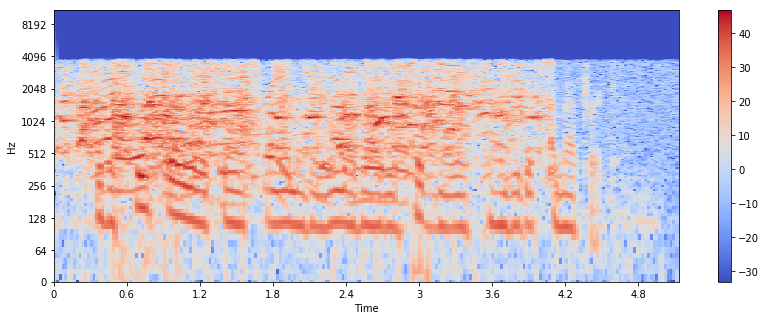

In [14]:
Smag = librosa.amplitude_to_db(S)
librosa.display.specshow(Smag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [17]:
X = numpy.absolute(S)
n_components = 16
W, H = librosa.decompose.decompose(X, n_components=n_components, sort=True)
print(W.shape)
print(H.shape)

(1025, 16)
(16, 221)


In [18]:
reconstructed_signal = scipy.zeros(len(x))
for n in range(n_components):
    Y = scipy.outer(W[:,n], H[n])*numpy.exp(1j*numpy.angle(S))
    y = librosa.istft(Y)
    reconstructed_signal[:len(y)] += y
    ipd.display( ipd.Audio(y, rate=sr) )